## DESCRIBING THE QUESTION

- The following questions were investigated and answered:
    - What genre would be recommended
    - Who are the target audience
    - Recommended directors for movie
    - Movie length recommendation
    - Who the competition is
        

## DATA UNDERSTANDING

IMPORTING THE NECESSARY LIBRARIES

In [1]:
import sqlite3
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Retrieving data from our dataset


In [2]:
# Unzipping the folder into the data folder
with zipfile.ZipFile("C:/Users/meshw/Downloads/im.db.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [3]:
# Reading from our datasets and connecting to the SQL data
bom_movie_data = pd.read_csv("data/bom.movie_gross.csv.gz")
tn_data = pd.read_csv("data/tn.movie_budgets.csv.gz")
conn = sqlite3.connect("data/im.db")

In [4]:
# Functions that will help us describe the data, the shape, the statistical description and gives an example output
def data_description(data):
    return data.info()
def data_shape(data):
    return data.shape
def stats_description(data):
    return data.describe()
def data_head(data):
    return data.head(1)

# function to query the tables in the im database
def query_imdb(selection,table_name):
    """
    Function allows you to query multiple tables, selecting all data iside it
    It returns the selected table in pandas dataframe format
    """
    cur = conn.cursor()
    query = """
    SELECT %s
    FROM %s
    """ %(selection,table_name)
    cur.execute(query)
    return pd.read_sql(query,conn)

#### Box Office Mojo 

In [5]:
# bom_movie_data.info()
data_description(bom_movie_data)
data_shape(bom_movie_data)
data_head(bom_movie_data)
stats_description(bom_movie_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


#### The Numbers

In [6]:
data_description(tn_data)
data_shape(tn_data)
data_head(tn_data)
stats_description(tn_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


#### IMDB

In [7]:
# principals table 
data_description(query_imdb("*","principals"))
data_shape(query_imdb("*","principals"))
data_head(query_imdb("*","principals"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"


In [8]:
# movie basics table
data_description(query_imdb("*","movie_basics"))
data_shape(query_imdb("*","movie_basics"))
data_head(query_imdb("*","movie_basics"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [9]:
# movie ratings table
data_description(query_imdb("*","movie_ratings"))
data_shape(query_imdb("*","movie_ratings"))
data_head(query_imdb("*","movie_ratings"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31


In [10]:
# movie akas table
data_description(query_imdb("*","movie_akas"))
data_shape(query_imdb("*","movie_akas"))
data_head(query_imdb("*","movie_akas"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0


In [11]:
# persons table
data_description(query_imdb("*","persons"))
data_shape(query_imdb("*","persons"))
data_head(query_imdb("*","persons"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"


In [12]:
# known for table
data_description(query_imdb("*","known_for"))
data_shape(query_imdb("*","known_for"))
data_head(query_imdb("*","known_for"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


,person_id,movie_id
0,nm0061671,tt0837562


In [13]:
# directors table
data_description(query_imdb("*","directors"))
data_shape(query_imdb("*","directors"))
data_head(query_imdb("*","directors"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


,movie_id,person_id
0,tt0285252,nm0899854


In [14]:
# writers table
data_description(query_imdb("*","writers"))
data_shape(query_imdb("*","writers"))
data_head(query_imdb("*","writers"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


,movie_id,person_id
0,tt0285252,nm0899854


## DATA PREPARATION

Here, the data we have will be cleaned, missing values and duplicates will also be dealt with

In [15]:
# function to check for missing values and their percentages
def missing_values(data):
    """
    Identify the missing values and their percentages
    Drop values that have no missing values
    Return only dara with missing values
    """
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values
    
# function to check for duplicated values
def duplicates(data):
    return data.duplicated().value_counts()


1. The Numbers

In [16]:
# Check for missing values
missing_values(tn_data)

,Missing Values,In Percentage


In [17]:
# Check for duplicate data
duplicates(tn_data.movie)

False    5698
True       84
Name: movie, dtype: int64

In [18]:
# Remove duplicate values
tn_data.drop_duplicates(subset="movie",inplace=True)
# Recheck to see if duplocates are dropped
duplicates(tn_data.movie)

False    5698
Name: movie, dtype: int64

In [19]:
# Remove the $ and , signs from production_budget, domestic_gross and worldwide_gross
tn_data.loc[:,["production_budget", 
               "domestic_gross", 
               "worldwide_gross"]] = tn_data.loc[:,["production_budget", 
                                                     "domestic_gross", 
                                                     "worldwide_gross"]].apply(lambda x: x.str.replace(",",""))
tn_data.loc[:,["production_budget", 
               "domestic_gross", 
               "worldwide_gross"]] = tn_data.loc[:,["production_budget", 
                                                    "domestic_gross", 
                                                    "worldwide_gross"]].apply(lambda x: x.str.replace("$","")).astype(float)

In [20]:
# Recheck the information on tn_data and see if the data types have been changed to float
data_description(tn_data)
data_shape(tn_data)
stats_description(tn_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5698 non-null   int64  
 1   release_date       5698 non-null   object 
 2   movie              5698 non-null   object 
 3   production_budget  5698 non-null   float64
 4   domestic_gross     5698 non-null   float64
 5   worldwide_gross    5698 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 311.6+ KB


,id,production_budget,domestic_gross,worldwide_gross
count,5698.000000,5.698000e+03,5.698000e+03,5.698000e+03
mean,50.320814,3.181423e+07,4.186763e+07,9.174801e+07
std,28.799762,4.197735e+07,6.833134e+07,1.754208e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.418872e+06,4.112890e+06
50%,50.000000,1.700000e+07,1.719656e+07,2.792412e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.808585e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [21]:
# check for missing values and duplicates in principals table
print(f'Missing values: \n{missing_values(query_imdb("*","principals"))}')
print(f'Duplicates: \n{duplicates(query_imdb("*","principals"))}')

Missing values: 
            Missing Values  In Percentage
job                 850502       0.827187
characters          634826       0.617423
Duplicates: 
False    1028186
dtype: int64


In [22]:
# check for missing values and duplicates in movie_basics table
print(f'Missing values: \n{missing_values(query_imdb("*","movie_basics"))}')
print(f'Duplicates: \n{duplicates(query_imdb("*","movie_basics"))}')

Missing values: 
                 Missing Values  In Percentage
runtime_minutes           31739       0.217176
genres                     5408       0.037005
original_title               21       0.000144
Duplicates: 
False    146144
dtype: int64


In [23]:
# check for missing values and duplicates in movie_ratings table
print(f'Missing values: \n{missing_values(query_imdb("*","movie_ratings"))}')
print(f'Duplicates: \n{duplicates(query_imdb("*","movie_ratings"))}')

Missing values: 
Empty DataFrame
Columns: [Missing Values, In Percentage]
Index: []
Duplicates: 
False    73856
dtype: int64


In [24]:
# check for missing values and duplicates in movie_akas table
print(f'Missing values: \n{missing_values(query_imdb("*","movie_akas"))}')
print(f'Duplicates: \n{duplicates(query_imdb("*","movie_akas"))}')

Missing values: 
                   Missing Values  In Percentage
attributes                 316778       0.955005
language                   289988       0.874240
types                      163256       0.492175
region                      53293       0.160665
is_original_title              25       0.000075
Duplicates: 
False    331703
dtype: int64


In [25]:
# check for missing values and duplicates in persons table
print(f'Missing values: \n{missing_values(query_imdb("*","persons"))}')
print(f'Duplicates: \n{duplicates(query_imdb("*","persons"))}')

Missing values: 
                    Missing Values  In Percentage
death_year                  599865       0.988819
birth_year                  523912       0.863618
primary_profession           51340       0.084629
Duplicates: 
False    606648
dtype: int64


In [26]:
# check for missing values and duplicates in known_for table
print(f'Missing values: \n{missing_values(query_imdb("*","known_for"))}')
print(f'Duplicates: \n{duplicates(query_imdb("*","known_for"))}')

Missing values: 
Empty DataFrame
Columns: [Missing Values, In Percentage]
Index: []
Duplicates: 
False    1638260
dtype: int64


In [27]:
# check for missing values and duplicates in directors table
print(f'Missing values: \n{missing_values(query_imdb("*","directors"))}')
print(f'Duplicates: \n{duplicates(query_imdb("*","directors"))}')

Missing values: 
Empty DataFrame
Columns: [Missing Values, In Percentage]
Index: []
Duplicates: 
False    163535
True     127639
dtype: int64


In [28]:
# check for missing values and duplicates in writers table
print(f'Missing values: \n{missing_values(query_imdb("*","writers"))}')
print(f'Duplicates: \n{duplicates(query_imdb("*","writers"))}')

Missing values: 
Empty DataFrame
Columns: [Missing Values, In Percentage]
Index: []
Duplicates: 
False    178352
True      77521
dtype: int64


Dealing with missing values from the relevant tables in imdb

In [29]:
# Dropping the death_year and birth_year columns as they have too many missing values
persons = query_imdb("*","persons").drop(axis=1, columns=["death_year","birth_year"])
persons

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [30]:
# Calculating the mean and median of the runtime_minutes column in movie basics 
print('Mean: {} \nMedian: {}'.format(query_imdb("runtime_minutes","movie_basics").mean(),
                                     query_imdb("runtime_minutes","movie_basics").median()))


Mean: runtime_minutes    86.187247
dtype: float64 
Median: runtime_minutes    87.0
dtype: float64


In [31]:
# replacing missing values with the median value
movie_basics = query_imdb("*","movie_basics") 
movie_basics["runtime_minutes"].fillna(movie_basics["runtime_minutes"].median(),inplace=True)

In [32]:
# check whether missing values have been dealt with
movie_basics["runtime_minutes"].isna().sum()

0

In [33]:
# Drop records that have missing genre values as 
#we do not want to use mode so as not to mislabel the movies
movie_basics.dropna(subset = ["genres"], inplace=True)

In [34]:
# check whether missing values have been dealt with
movie_basics["genres"].isna().sum()

0

In [35]:
# Drop records that have missing original title values as 
#we do not want to use mode so as not to mislabel the movies
movie_basics.dropna(subset = ["original_title"], inplace=True)

In [36]:
# check whether missing values have been dealt with
movie_basics["original_title"].isna().sum()

0

3. Bom Movies

In [37]:
# Check for missing values
missing_values(bom_movie_data)

,Missing Values,In Percentage
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


In [38]:
# Drop rows containing missing values in studio and domestic gross
bom_movie_data.dropna(subset=["studio","domestic_gross"],inplace=True)

In [39]:
#Remove commas from the numbers and Change foreign_gross column to type float
bom_movie_data.foreign_gross = bom_movie_data.loc[:,["foreign_gross"]].apply(lambda x: x.str.replace(",",""))
bom_movie_data.foreign_gross=bom_movie_data.foreign_gross.astype(float)


In [40]:
# Check mean and median for foreign gross
print('Mean: {} \nMedian: {}'.format(bom_movie_data.foreign_gross.mean(),
                                     bom_movie_data.foreign_gross.median()))

Mean: 75790384.84130543 
Median: 19400000.0


In [41]:
# Replace nan values with the median
bom_movie_data.fillna(bom_movie_data.median(),inplace = True)

In [42]:
# confirm the description
data_description(bom_movie_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [43]:
# Check for duplicates
duplicates(bom_movie_data.title)

False    3355
True        1
Name: title, dtype: int64

In [44]:
# Drop duplicates
bom_movie_data.drop_duplicates(subset= "title",inplace=True)

In [45]:
# confirm if the changes took place
duplicates(bom_movie_data.title)

False    3355
Name: title, dtype: int64

## DATA ANALYSIS

#### What genre brought in the most income?
- The data in use will be from movie_basics table and tn_data.
- The output will be genre and income based off the worldwide gross 
- A plot showing the relationship between genre and income will be generated

In [46]:
#variable movie_list will hold a dataframe that has movie details similar in movie_basics and tn_data 
movie_list = pd.merge(movie_basics,tn_data,how="inner",left_on="original_title",right_on ="movie")
print('Length of movie_basics: {} \nLenght of tn_data: {} '.format(len(movie_basics),
                                                                   len(tn_data)))
print('Length of movie_list: {}'.format(len(movie_list)))
movie_list = movie_list.loc[:,["original_title",
                               "runtime_minutes",
                               "genres",
                               "production_budget",
                               "domestic_gross",
                                "worldwide_gross"]]
movie_list


Length of movie_basics: 140734 
Lenght of tn_data: 5698 
Length of movie_list: 3298


,original_title,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,91.0,"Action,Animation,Comedy",45000000.0,0.0,73706.0
1,Mortal Kombat,87.0,"Action,Adventure,Fantasy",20000000.0,70433227.0,122133227.0
2,On the Road,124.0,"Adventure,Drama,Romance",25000000.0,720828.0,9313302.0
3,On the Road,90.0,Drama,25000000.0,720828.0,9313302.0
4,On the Road,87.0,Documentary,25000000.0,720828.0,9313302.0
...,...,...,...,...,...,...
3293,The Blue Bird,84.0,Drama,1200000.0,887000.0,887000.0
3294,Fuel,87.0,"Documentary,Sport",2500000.0,174255.0,174255.0
3295,Diner,87.0,Crime,5000000.0,12592907.0,12592907.0
3296,Traitor,110.0,"Action,Drama,Romance",22000000.0,23530831.0,27882226.0


In [47]:
# create a new column called profits that finds the profit a movie makes
movie_list["profits"] = movie_list["worldwide_gross"] - movie_list["production_budget"]
movie_list.sort_values(by="profits",ascending=False,inplace=True)
movie_list


,original_title,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,profits
2308,Titanic,115.0,Family,200000000.0,659363944.0,2.208208e+09,2.008208e+09
2307,Titanic,87.0,Adventure,200000000.0,659363944.0,2.208208e+09,2.008208e+09
2862,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09
10,Jurassic World,124.0,"Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09
128,The Avengers,143.0,"Action,Adventure,Sci-Fi",225000000.0,623279547.0,1.517936e+09,1.292936e+09
...,...,...,...,...,...,...,...
3229,Call of the Wild,87.0,"Adventure,Animation,Family",82000000.0,0.0,0.000000e+00,-8.200000e+07
3073,Bright,117.0,"Action,Crime,Fantasy",90000000.0,0.0,0.000000e+00,-9.000000e+07
2141,Men in Black: International,115.0,"Action,Adventure,Comedy",110000000.0,3100000.0,3.100000e+06,-1.069000e+08
664,Mars Needs Moms,88.0,"Adventure,Animation,Family",150000000.0,21392758.0,3.954976e+07,-1.104502e+08


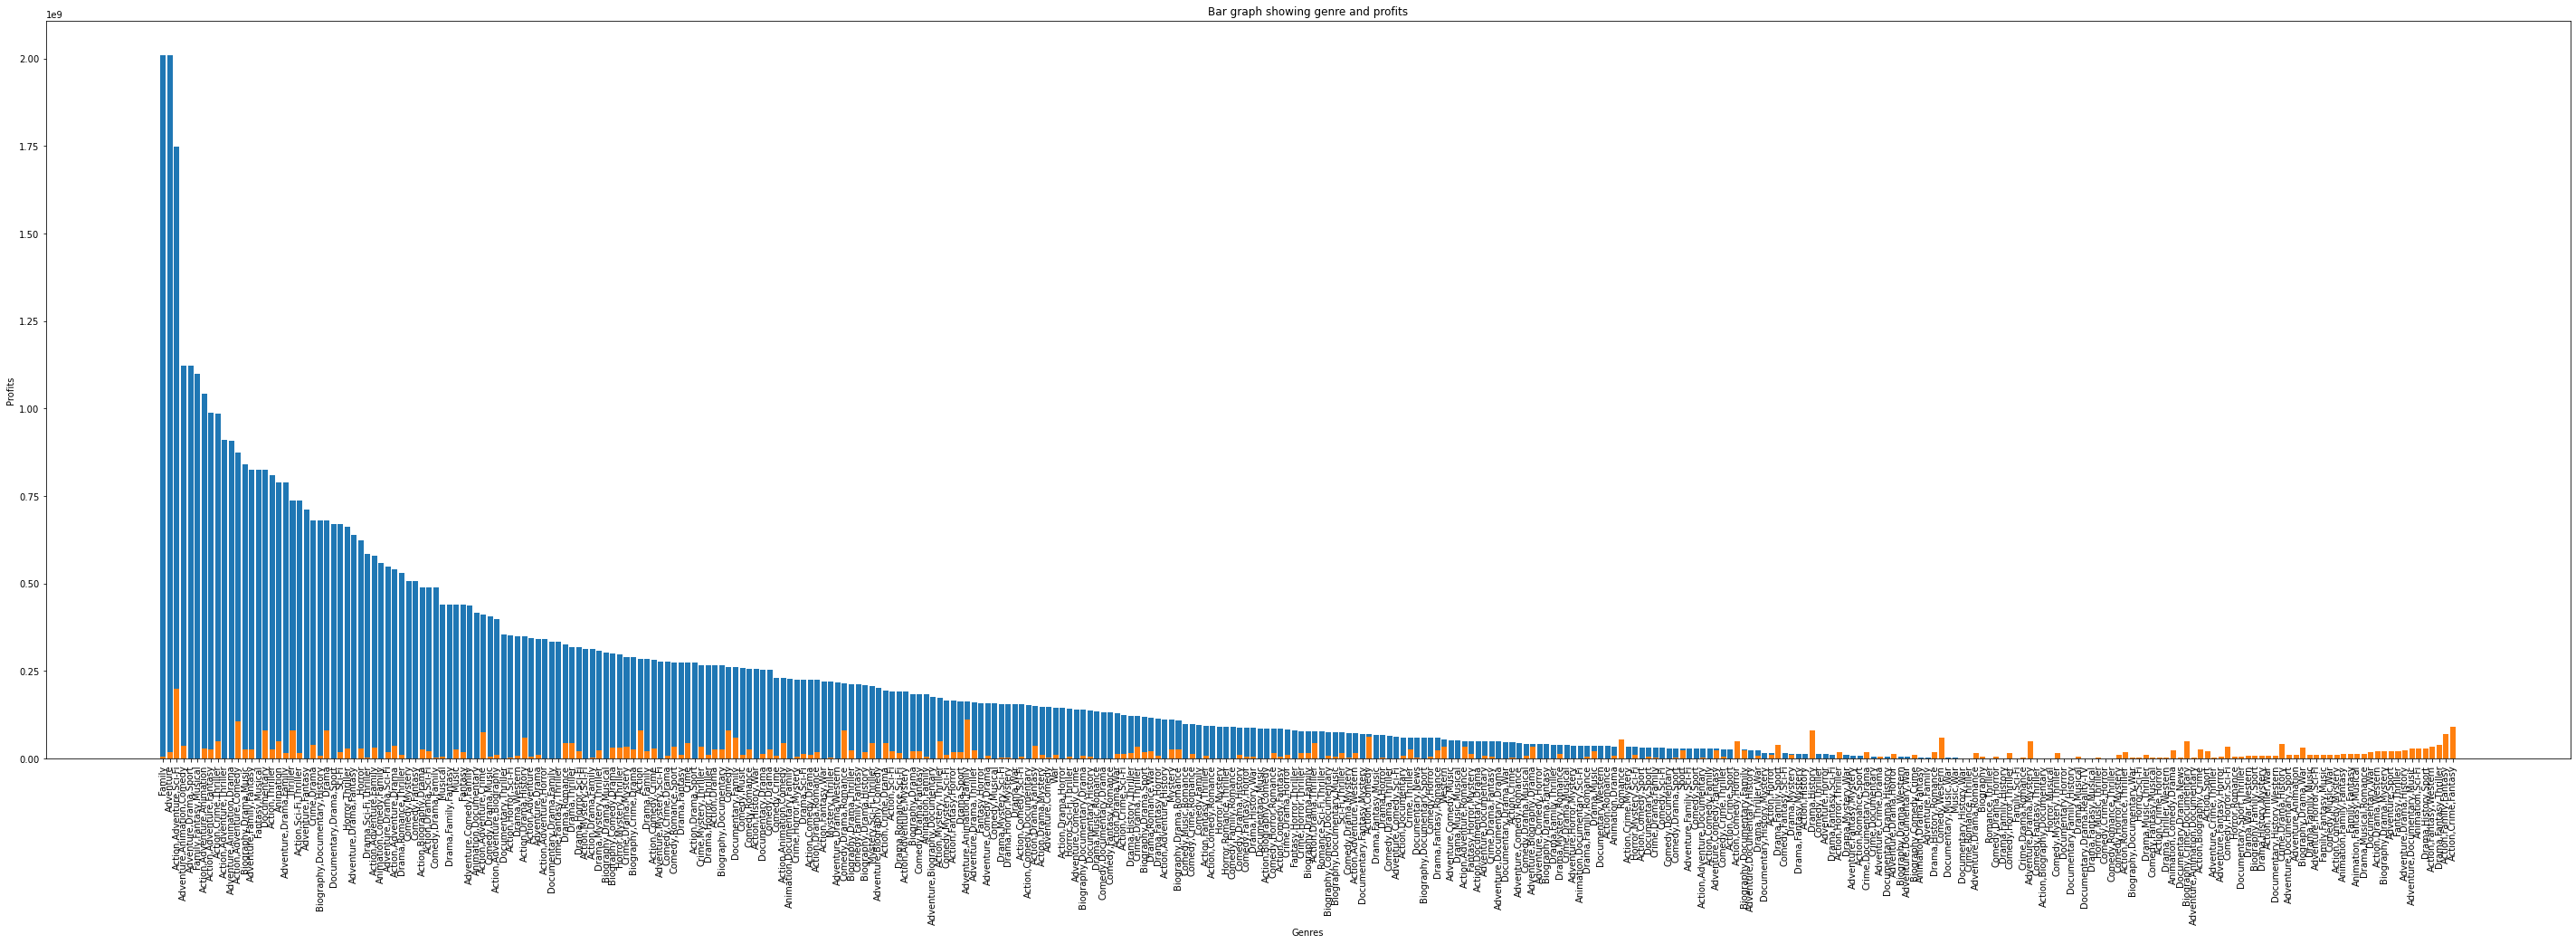

In [48]:
# Set up plot
fig,ax = plt.subplots(figsize=(50,15))

# Customize variables
x1 = movie_list.loc[movie_list["profits"] > 0, "genres"]
y1 = movie_list.loc[movie_list["profits"] > 0, "profits"]
x2 = movie_list.loc[movie_list["profits"] < 0, "genres"]
y2 = movie_list.loc[movie_list["profits"] < 0, "profits"]

# Plot 2 bar graphs overlaying them 
ax.bar(x = x1, height=y1)
ax.bar(x = x2, height=abs(y2))

# Customize labels
ax.set_xlabel("Genres")
ax.set_ylabel("Profits")
ax.set_title("Bar graph showing genre and profits")

ax.tick_params(axis="x", labelrotation = 90)
fig.savefig("images/Movie Genres and their profits.png")
plt.show()

From the above we can see that:
- The top 3 genres with the highest profits are:
        - Family, 
        - Adventure,
        - genre combination of Action,Adventure and Sci-Fi
- The top 3 genres with the greatest losses are:
       - genre combination of Action,Adventure and Sci-Fi,
       - genre combination of Adventure,Animation and Family,
       - genre combination of Action,Adventure and Comedy



#### Where should the company focus its sales on
- The data in use will be from movie_basics table and tn_data.
- The output will be genre and income based off the worldwide gross and domestic gross
- A plot showing the most profitable of the two options is generated

In [49]:
print('The average domestic sales: {} \nThe average forign sales: {}'.format(
                                                                        movie_list["domestic_gross"].mean(),
                                                                        movie_list["worldwide_gross"].mean()))
print('The Difference: {}'.format(
                            (movie_list["domestic_gross"].mean()-movie_list["worldwide_gross"]).mean()))

The average domestic sales: 40503679.881746516 
The average forign sales: 95457513.01879928
The Difference: -54953833.13705276


- The difference between the averages of the domestic and worldwide gross is negative. This shows that the sales on the worlwide platform are more than those of the domestic one.



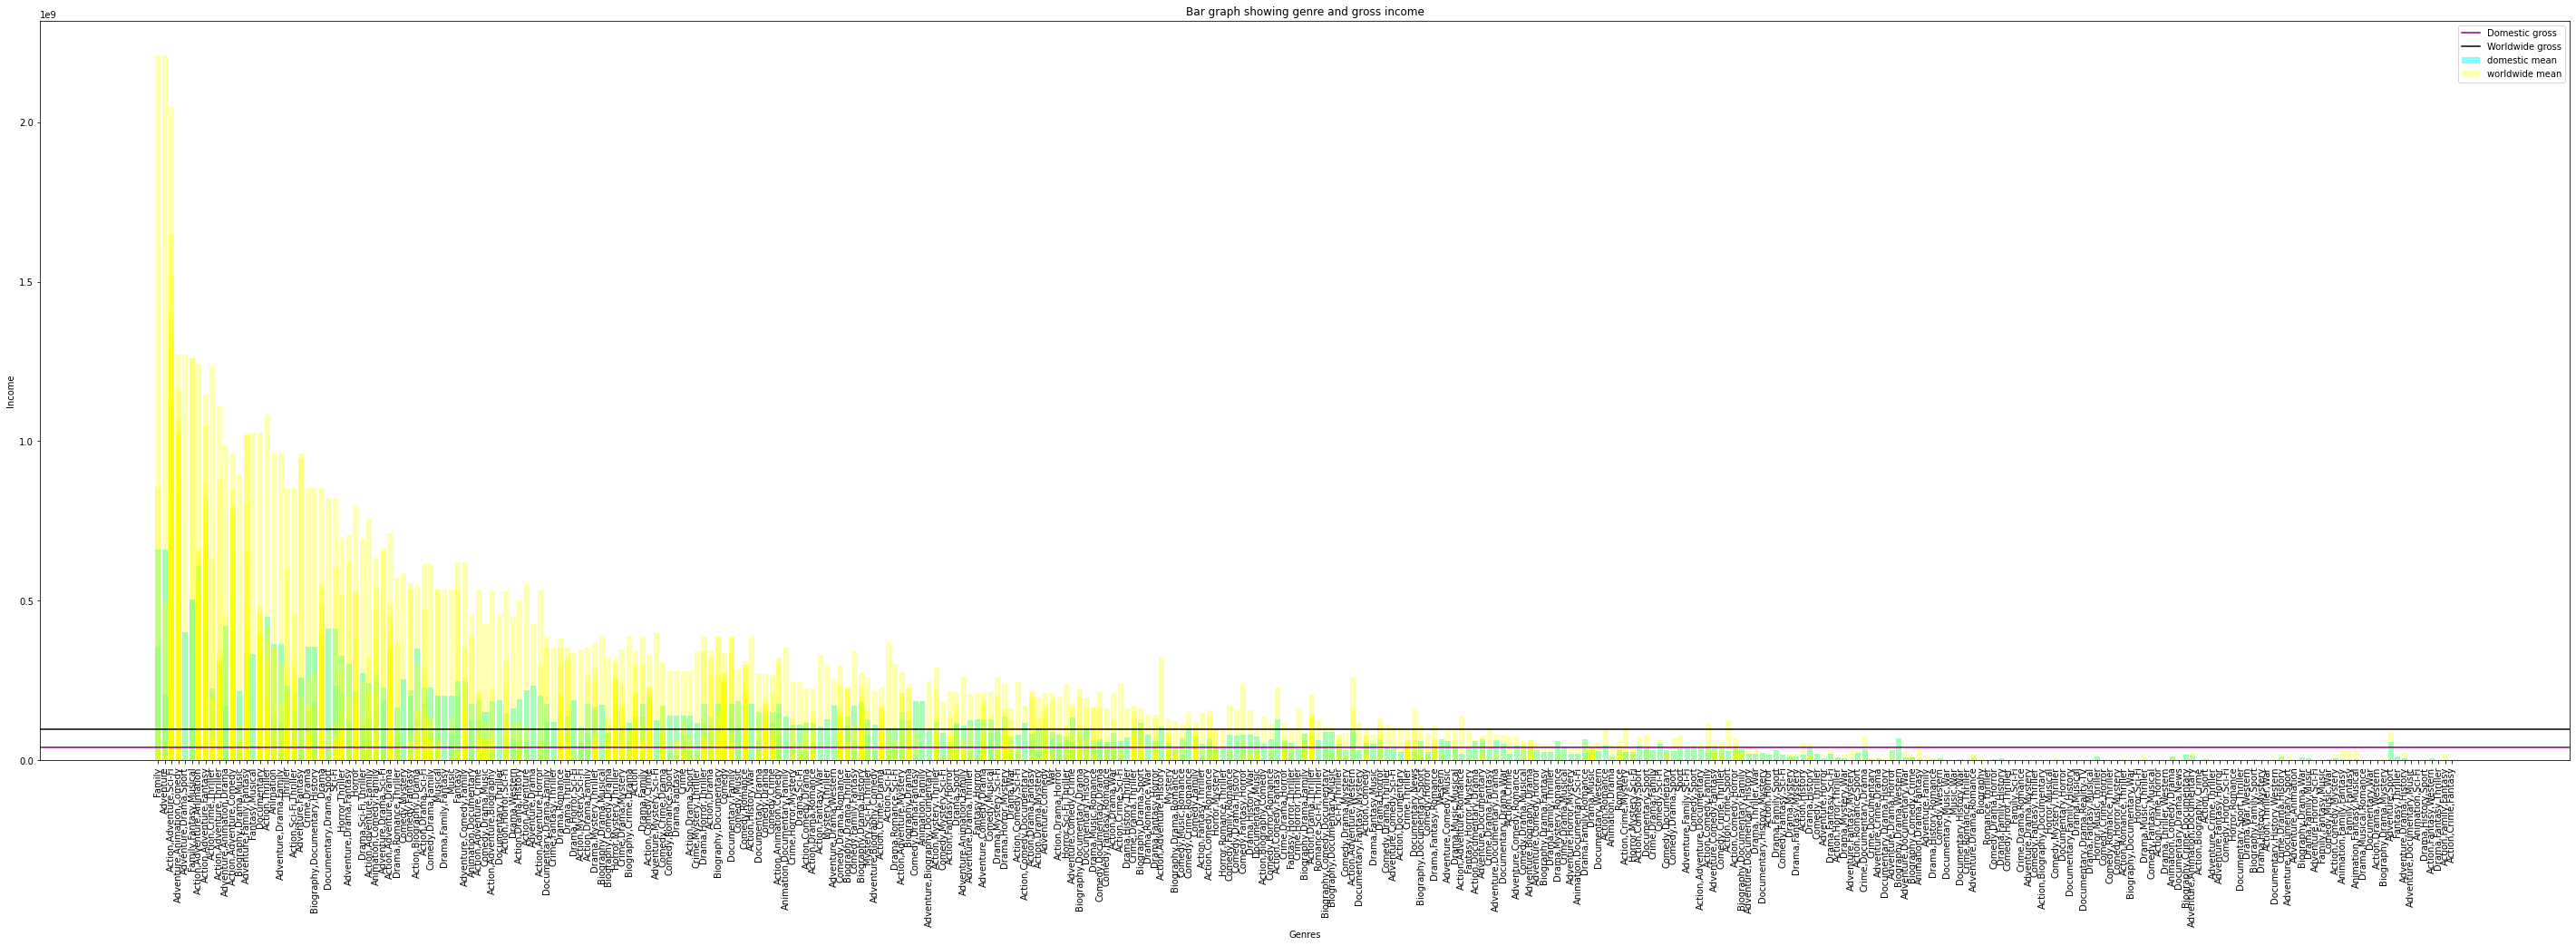

In [50]:
# Set up plot
fig,ax = plt.subplots(figsize=(50,15))

# Customize variables
x = movie_list.loc[:,"genres"]
y1 = movie_list.loc[:, "domestic_gross"]
y2 = movie_list.loc[:, "worldwide_gross"]

# Plot 2 bar graphs overlaying them 
ax.bar(x = x, height=y1,alpha=0.5,color="cyan")
ax.bar(x = x, height=y2,alpha=0.3,color="yellow")
ax.axhline(y1.mean(),color='purple')
ax.axhline(y2.mean(),color='black')

# Customize labels
ax.set_xlabel("Genres")
ax.set_ylabel("Income")
ax.set_title("Bar graph showing genre and gross income")
ax.legend(["Domestic gross","Worldwide gross","domestic mean","worldwide mean"])

ax.tick_params(axis="x", labelrotation = 90)
fig.savefig("images/Movie genres and sale locations.png")
plt.show()

- From the above we can conclude that movies released for sale worldwide are significantly more profitable than those released for sale locally
- This further proves the inference we made in the mean of the domestic and worldwide sales

#### Which directors brought in the most ratings
- The tables directors and movie ratings and movie_basics from imdb will be analyzed
- The output shall be the top 10 highest rated directors

In [51]:
directors = query_imdb("*","directors")
movie_ratings = query_imdb("*","movie_ratings")
directors_table = pd.merge(
                        pd.merge(pd.merge(directors,persons,how="inner",left_on="person_id",right_on="person_id"),
                                 movie_ratings,how="inner", left_on="movie_id",right_on="movie_id"),
                                 movie_basics,how="inner",on="movie_id")

In [52]:
# directors.merge(persons, how="inner", on="person_id").merge()
directors_table.sort_values(by="averagerating",inplace=True)

In [53]:
# Find mean and median average rating
print('Mean averagerating: {} \nMedian averagerating: {}'.format(directors_table["averagerating"].mean(),
                                                                 directors_table["averagerating"].median()))

Mean averagerating: 6.2139102567662885 
Median averagerating: 6.3


In [54]:
# names of directors,average rating and profession who have an avarage rating greater than mean
top_directors = directors_table.loc[directors_table["averagerating"].value_counts()]
director_names = top_directors.loc[top_directors["averagerating"] > directors_table["averagerating"].mean(),
                                   ["primary_name","averagerating","primary_profession"]][:10]
director_names.sort_values(by="averagerating", ascending=False, inplace=True)
director_names

,primary_name,averagerating,primary_profession
8669,Reinhard Kungel,8.7,"director,writer,cinematographer"
5542,Erik Matti,7.8,"director,writer,producer"
3731,Mark Adams,7.8,"director,writer,producer"
3937,Ana Rieper,7.0,director
4268,Aydin Bulut,6.9,"director,writer,assistant_director"
5603,Valeria Testagrossa,6.6,"director,cinematographer,writer"
3126,Francesco Longo,6.4,"visual_effects,director,writer"
3085,Davide Pesca,6.4,"director,writer,producer"
5758,Ignas Jonynas,6.3,"director,actor,writer"
5723,Yaroslav Chevazhevskiy,6.3,"director,writer,actor"


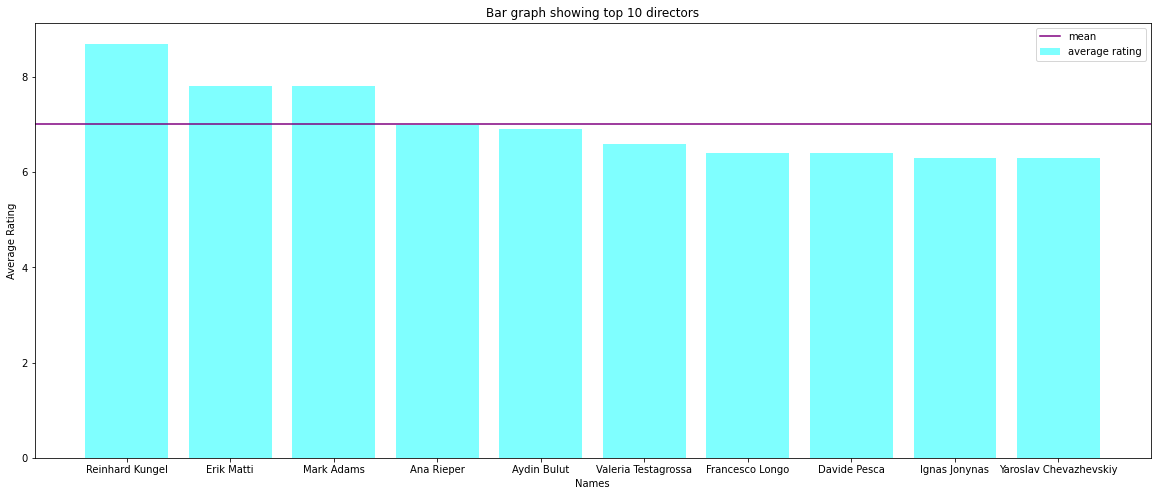

In [61]:
# Plot of names vs average rating
fig,ax = plt.subplots(figsize=(20,8))

x = director_names["primary_name"]
y = director_names["averagerating"]

ax.bar(x = x, height=y,alpha=0.5,color="cyan")
ax.axhline(director_names["averagerating"].mean(),color='purple')

# Customize labels
ax.set_xlabel("Names")
ax.set_ylabel("Average Rating")
ax.set_title("Bar graph showing top 10 directors")
ax.legend(["mean","average rating"])

fig.savefig("images/Top 10 directors.png");


- The director names listed above have produced films that have been rated at 6.32 and above.
- The mean of the average ratings was used as the cutaway so as to not list directors who had films that had a lot of ratings but were average. 
- The directors can be consulted and/or hired for future movie roles

#### Is there a relationship between runtime and ratings
- The directors table will be in use 
- A scatter plot shall be used to determine if the two have a relation


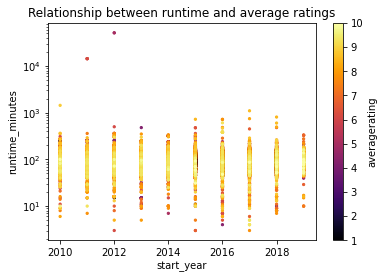

In [63]:
# Scatter plot
directors_table.plot.scatter(x="start_year",
                             y="runtime_minutes",
                             c="averagerating",
                             s=5,
                             colormap='inferno',
                             sharex=False)
plt.yscale("log")
plt.title("Relationship between runtime and average ratings")
fig.savefig("images/Runtime and average rating.png")
plt.show()


- It can be seen that through the years, the movies having a runtime of between 40 minutes to 120 minutes had higher ratings.

#### What are the top 5 studios
- The data in use will be from bom movies
- The output is the top 5 studios with the most earnings

In [64]:
# Group by studio and sum the alues to get the total gross income so far per studio 
studio_list = bom_movie_data.loc[:,
         ["studio","domestic_gross","foreign_gross"]].groupby("studio").sum()

In [65]:
# Find mean and median worldwide gross amounts
print('Mean worldwide gross: {} \nMedian worldwide gross: {}'.format(studio_list["foreign_gross"].mean(),
                                                                     studio_list["foreign_gross"].median()))

Mean worldwide gross: 699068636.7705883 
Median worldwide gross: 38800000.0


In [66]:
# sort the top studios by foreign gross and display only the top 5 studios
studio_list.sort_values(by="foreign_gross",ascending=False, inplace=True)
top_studios = studio_list.iloc[:5]
top_studios.reset_index(inplace = True)
top_studios

,studio,domestic_gross,foreign_gross
0,BV,1.841903e+10,2.583265e+10
1,Fox,1.094950e+10,2.009467e+10
2,WB,1.216805e+10,1.886190e+10
3,Uni.,1.290239e+10,1.691297e+10
4,Sony,8.459683e+09,1.402284e+10


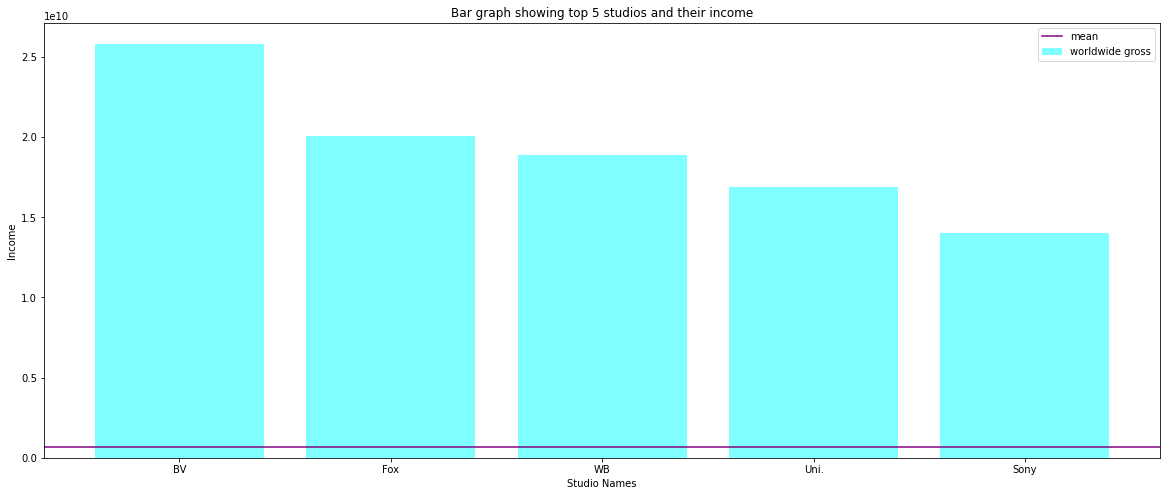

In [67]:
# Plot of names vs average rating
fig,ax = plt.subplots(figsize=(20,8))

x = top_studios["studio"]
y = top_studios["foreign_gross"]

ax.bar(x = x, height=y,alpha=0.5,color="cyan")
ax.axhline(studio_list["foreign_gross"].mean(),color='purple')

# Customize labels
ax.set_xlabel("Studio Names")
ax.set_ylabel("Income")
ax.set_title("Bar graph showing top 5 studios and their income")
ax.legend(["mean","worldwide gross"])

fig.savefig("images/Top 5 studios.png");


- The top studios are:
    - BV
    - Fox
    - WB
    - Uni
    - Sony
- These are future competitors and the bar chart shows their income over time
- The studios have an income that is way above the worldwide gross mean


## Recommendations

#### Microsoft recommendations for their new movie studio would be:
#####  1. Genre Recommendations

These recommendations were based on the profits and losses made on each genre

- For the single genres, the following would be best:
    - Family
    - Adventure
    - Fantasy musical
- For multicategory genres, the following would be best:
    - Action, Adventure, Scifi
    - Adventure, Animation, Comedy
    - Adventure, Drama, Sport
- Categories that brought losses:
    - Action, Adventure, Scifi
    - Adventure, Animation, Family
    - Action, Adventure, Comedy
    
##### 2. Target Audience

The recommended audience would be worldwide as they brought in significantly more income to the company. 

It is seen that the difference between foreign and worldwide sales was 54953833.13705276.

This means releasing the movies to the domestic audience would incur in losses when compared to releasing to the world audience.

##### 3. Directors to be considered for the movie productions

The director recommendation is based on the average ratings they have

- The following directors would be best for consultation or hiring when working on the different films:
    - Reinhard Kungel
    - Erik Matti
    - Mark Adams
    - Ana Reiper
    - Aydin Bulut
    - Valeria Testagrossa
    - Fancesco Longo
    - Davide Pesca
    - Ignas Joynas
    
##### 4.  Movie Length

The movie length should range from 40 to 120 minutes. This is because movies that lie in this range had better ratings through the years compared to other times

#### 5. Competition
 
- The top studios that they would be in competition with are:
    - Studio BV
    - Fox
    - Warner Bros (WB)
    - Universal Pictures (Uni)
    - Sony  